In [56]:
# numerical module
import numpy as np

#setup plotting 
import matplotlib.pyplot as plt
plt.style.use('./SciencePlots-APS.mplstyle')


## Plot bandstructure

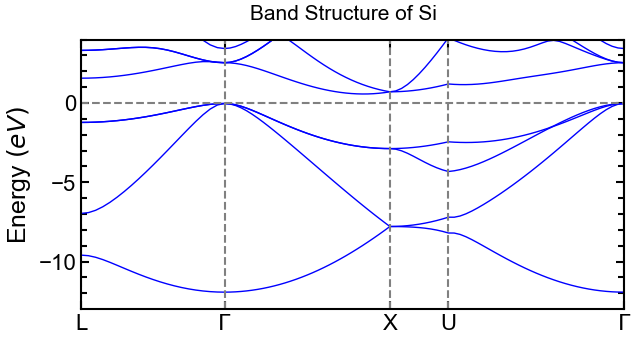

In [57]:
# Define a function to read files, shape the data into arrays
# used for plotting, and shift the energy values so that the
# zero of energy is the Fermi energy. 
def read_band(file, E_F):
    dat = np.loadtxt(file)

    k_lst = np.unique(dat[:, 0])
    
    E_k = (np.reshape(dat[:, 1], (-1, len(k_lst))).T) - E_F

    return k_lst, E_k

# Read data file and put into corresponding arrays.
k_lst, E_k = read_band('./data/si.bands.gnu', 6.255)

# Define high symmetry points.
k_hs = np.array([k_lst[0], k_lst[20], k_lst[50], k_lst[60], k_lst[90]])

k_hs_label = np.array([r'L', r'$\Gamma$', r'X', r'U', r'$\Gamma$'])

# Plotting
fig, ax = plt.subplots(1, figsize = (7, 3.5))
fig.suptitle("Band Structure of Si", fontsize = 15)

color = 'b'
lw = 1.0
for i in range(0, E_k.shape[1]):
    
    ax.plot(k_lst, E_k[:, i], color = color, lw = lw)

ax.set_xlim(k_hs[0], k_hs[-1])
ax.set_xticks(k_hs)
ax.set_xticklabels(k_hs_label)
ax.tick_params(axis = 'x', which = 'minor', bottom = False, top = False)

ax.set_ylim(-13.0, 4.0)
ax.set_ylabel(r'Energy $\left(eV\right)$')
ax.axhline(0, color = 'gray', ls = '--', lw = 1.5)

for k in k_hs:
    ax.axvline(k, color = 'gray', ls = '--', lw = 1.5)

fig.savefig('./bandstructure_Si.png', dpi = 600)
plt.show()

## Plot density-of-states (DOS)

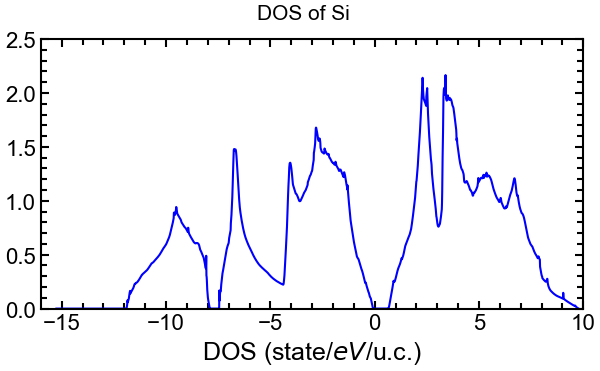

In [58]:
# Make a similar function to read the density of states
def read_DOS(file, E_F):
    E, DOS, iDOS = np.loadtxt(file, unpack = True)
    
    E -= E_F
    
    return E, DOS

# Get DOS data
E, DOS = read_DOS('./data/si.dos', 6.255)

# Plotting
fig, ax = plt.subplots(1, figsize = (7, 3.5))
fig.suptitle("DOS of Si", fontsize = 15)

ax.plot(E, DOS, 'b-', lw = 1.5)

ax.set_xlabel(r'DOS (state/$eV$/u.c.)')
ax.set_xlim(-16, 10)
ax.set_ylim(0, 2.5)


fig.savefig('./DOS_Si.png', dpi = 600)

plt.show()

## Plot bandstructure alongside with DOS

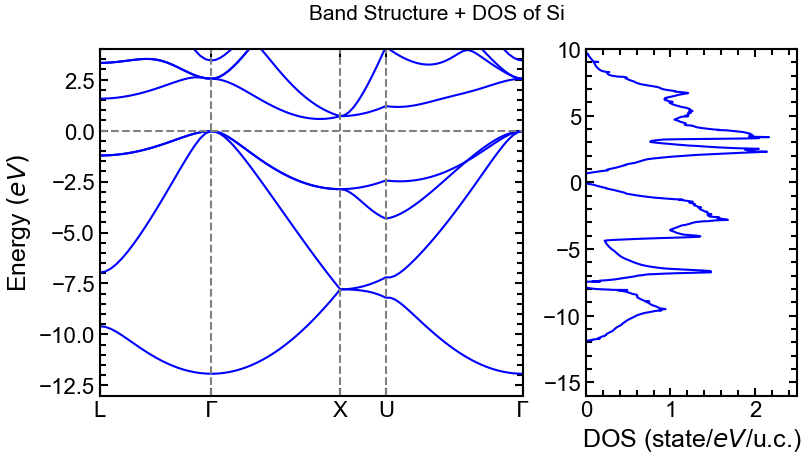

In [59]:
# Plotting
fig, ax = plt.subplots(1, 2, figsize = (9, 4.5), gridspec_kw = {'width_ratios' : [6, 3]})
fig.suptitle("Band Structure + DOS of Si", fontsize = 15)

lw = 1.5
color = 'b'
for i in range(0, E_k.shape[1]):
    ax[0].plot(k_lst, E_k[:, i], color = color, lw = lw)

ax[1].plot(DOS, E, 'b-', lw = 1.5)

ax[0].set_xlim(k_hs[0], k_hs[-1])
ax[0].set_xticks(k_hs)
ax[0].set_xticklabels(k_hs_label)
ax[0].tick_params(axis = 'x', which = 'minor', bottom = False, top = False)

ax[0].set_ylabel(r'Energy $\left(eV\right)$')
ax[0].set_ylim(-13.0, 4.0)
ax[0].axhline(0, color = 'gray', ls = '--', lw = 1.5)

ax[1].set_xlabel(r'DOS (state/$eV$/u.c.)')
ax[1].set_xlim(0, 2.5)
ax[1].set_ylim(-16.0, 10.0)

for k in k_hs:
    ax[0].axvline(k, color = 'gray', ls = '--', lw = 1.5)

fig.savefig('./bandstructure+DOS_Si.png', dpi = 600)

plt.show()

## Plot LDOS and PDOS

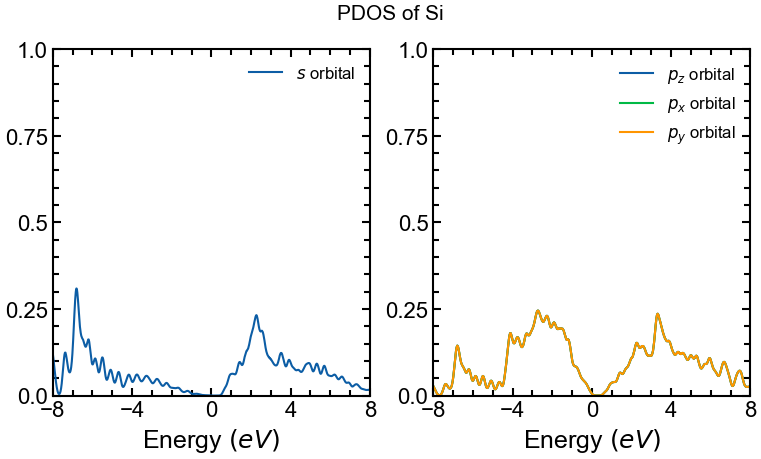

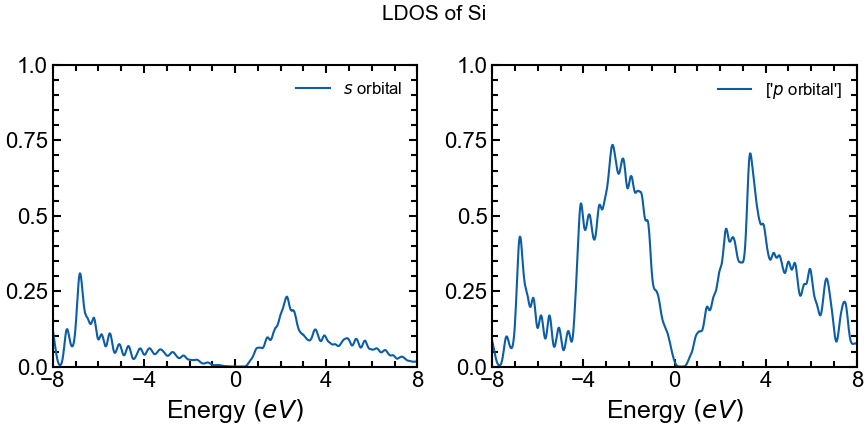

In [62]:
# Make another similar function to read partial DOS data
def read_PDOS(file, E_F):
    x = np.loadtxt(file, unpack = True)
    
    E = x[0] - E_F

    LDOS = x[1]

    PDOS = np.swapaxes(x[2:], 0, 1) # This is done so that plotting using the syntax
                                    # plot(x, [ [y1[1],y2[1],y3[1]] , [y1[2],y2[2],y3[2]], ...]) is possible
    
    return E, LDOS, PDOS

# Read PDOS data and plot

file = ['si.pdos_atm#1(Si)_wfc#1(s)', 'si.pdos_atm#1(Si)_wfc#2(p)'] 

fig, ax = plt.subplots(1, 2, figsize = (9, 4.5))
figg, axx = plt.subplots(1, 2, figsize = (9, 4.5))

fig.suptitle('PDOS of Si', fontsize = 15)
figg.suptitle('LDOS of Si', fontsize = 15)

label = [r'$s$ orbital', [r'$p_z$ orbital', r'$p_x$ orbital', r'$p_y$ orbital']] # label list
labell = [r'$s$ orbital', [r'$p$ orbital']]

# Read and plot
for i in range(len(file)):
    E, LDOS, PDOS = read_PDOS('./data/' + file[i], 6.255)
    ax[i].plot(E, PDOS, lw = 1.5, label = label[i])
    axx[i].plot(E,LDOS, lw = 1.5, label = labell[i])

# Customization
yticks = [np.linspace(0, 1, 5), np.linspace(0, 1, 5)]

yticklabels = [list(map(str, yticks[0])), list(map(str, yticks[1]))]

lim = [1.0, 1.0]

for i in range(2):
    ax[i].set_xlabel(r'Energy $\left(eV\right)$')
    ax[i].set_xlim(-8, 8)
    ax[i].set_xticks(np.linspace(-8, 8, 5))

    ax[i].set_ylim(0.0, lim[i])
    ax[i].set_yticks(yticks[i])
    ax[i].set_yticklabels(yticklabels[i])

    ax[i].legend(loc = 'best', prop = {'size' : 12})

    axx[i].set_xlabel(r'Energy $\left(eV\right)$')
    axx[i].set_xlim(-8, 8)
    axx[i].set_xticks(np.linspace(-8, 8, 5))

    axx[i].set_ylim(0.0, lim[i])
    axx[i].set_yticks(yticks[i])
    axx[i].set_yticklabels(yticklabels[i])

    axx[i].legend(loc = 'best', prop = {'size' : 12})

plt.tight_layout()

fig.savefig('./PDOS_Si.png', dpi = 600)
figg.savefig('./LDOS of SI.png', dpi = 600)

plt.show()